# Classification of vehicles (bus, car and van) using features extracted from the silhouette

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# 2. Read File

In [2]:
df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
df.shape

(846, 19)

In [4]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

# 3. Missing values check/replacement

In [5]:
df.isna().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

In [6]:
df_missing = df[df.isna().any(axis=1)]
df_missing.head()

compactness  circularity  distance_circularity  radius_ratio  \
5           107          NaN                 106.0         172.0   
9            93         44.0                  98.0           NaN   
19          101         56.0                 100.0         215.0   
35          100         46.0                   NaN         172.0   
66           81         43.0                  68.0         125.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                   50.0                        6          255.0   
9                   62.0                       11          183.0   
19                   NaN                       10          208.0   
35                  67.0                        9          157.0   
66                  57.0                        8          149.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5            26.0                    28.0                        169   
9            36.0                    22.0                        146   
19           32.0                    24.0                        169   
35           43.0                    20.0                        150   
66           46.0                    19.0                        146   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5             280.0              957.0                      264.0   
9             202.0              505.0                      152.0   
19            227.0              651.0                      223.0   
35            170.0              363.0                      184.0   
66            169.0              323.0                      172.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                          85.0             5.0               9.0   
9                          64.0             4.0              14.0   
19                         74.0             6.0               5.0   
35                         67.0            17.0               7.0   
66                          NaN             NaN              18.0   

    skewness_about.2  hollows_ratio class  
5              181.0            183   bus  
9              195.0            204   car  
19             186.0            193   car  
35             192.0            200   van  
66             179.0            184   bus

In [7]:
df.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [8]:
df.fillna(df.median(), inplace=True)
df.iloc[[5,9,19,35,66],:]

compactness  circularity  distance_circularity  radius_ratio  \
5           107         44.0                 106.0         172.0   
9            93         44.0                  98.0         167.0   
19          101         56.0                 100.0         215.0   
35          100         46.0                  80.0         172.0   
66           81         43.0                  68.0         125.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                   50.0                        6          255.0   
9                   62.0                       11          183.0   
19                  61.0                       10          208.0   
35                  67.0                        9          157.0   
66                  57.0                        8          149.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5            26.0                    28.0                        169   
9            36.0                    22.0                        146   
19           32.0                    24.0                        169   
35           43.0                    20.0                        150   
66           46.0                    19.0                        146   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5             280.0              957.0                      264.0   
9             202.0              505.0                      152.0   
19            227.0              651.0                      223.0   
35            170.0              363.0                      184.0   
66            169.0              323.0                      172.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                          85.0             5.0               9.0   
9                          64.0             4.0              14.0   
19                         74.0             6.0               5.0   
35                         67.0            17.0               7.0   
66                         71.5             6.0              18.0   

    skewness_about.2  hollows_ratio class  
5              181.0            183   bus  
9              195.0            204   car  
19             186.0            193   car  
35             192.0            200   van  
66             179.0            184   bus

# 4. Exploratory Data Analysis

## 4.1 Get Statistics

In [9]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

## 4.2 Handle Outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

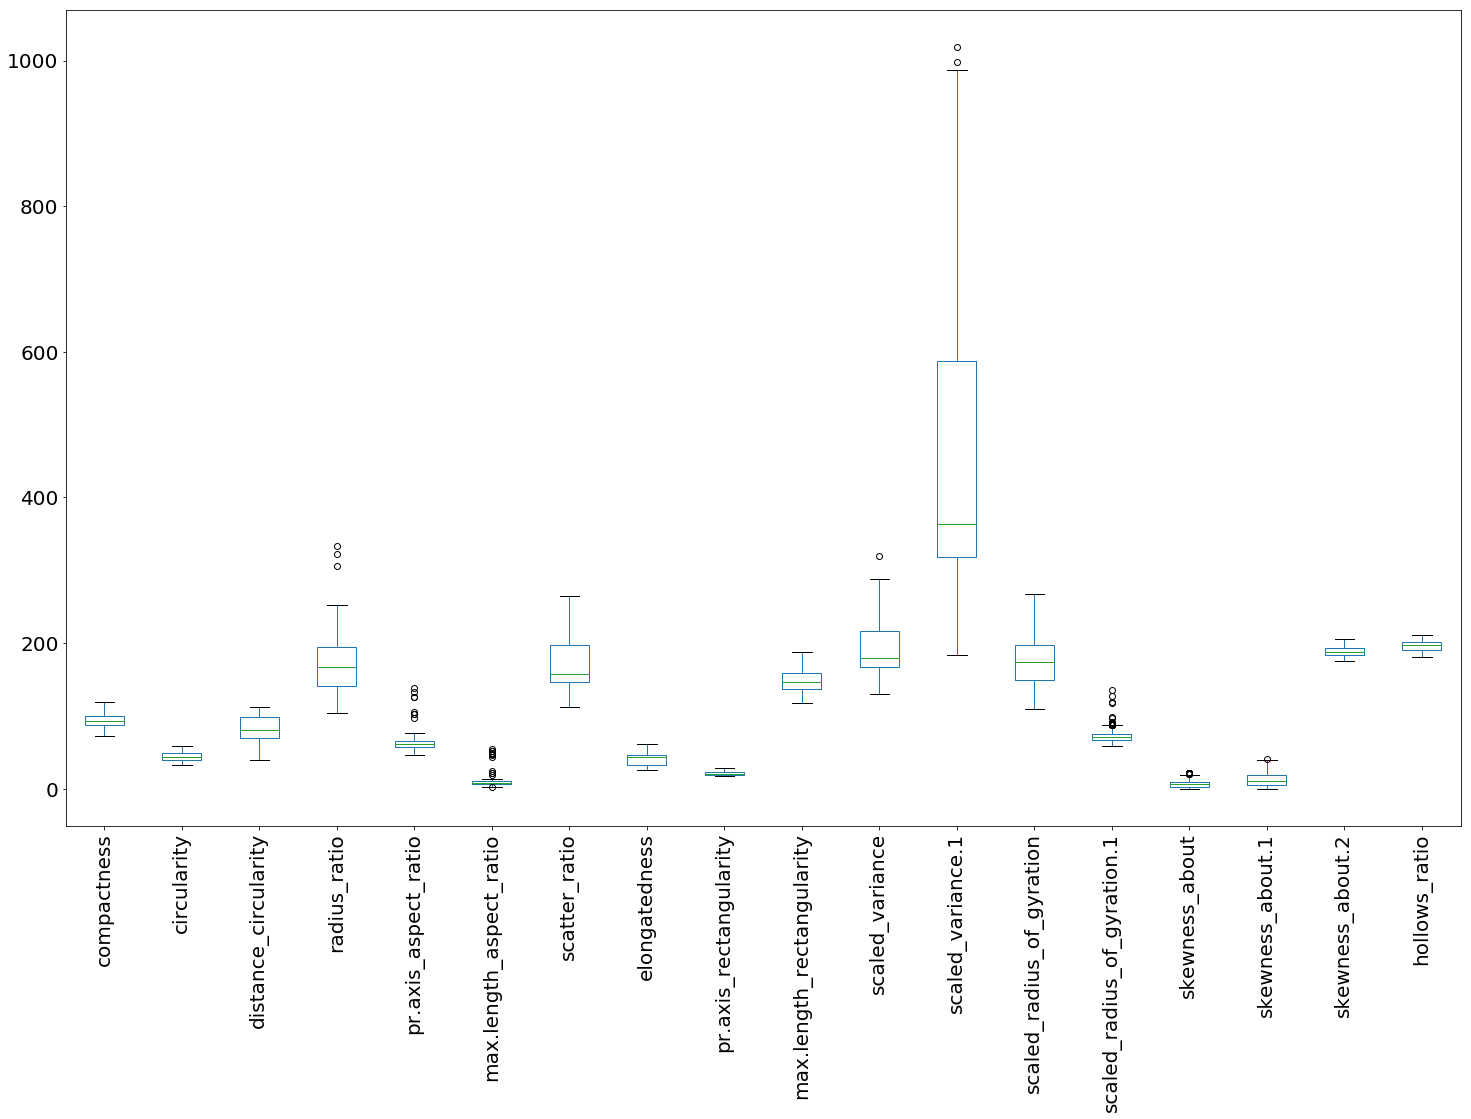

In [10]:
df.plot(kind='box', figsize=(25,15), fontsize=20)
plt.xticks(rotation=90)

### Observation:

In [11]:
for col_name in df.columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
    
    low = q1-1.5*IQR
    high = q3+1.5*IQR
    
    df.loc[(df[col_name]<low) | (df[col_name]>high), col_name] = df[col_name].median()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

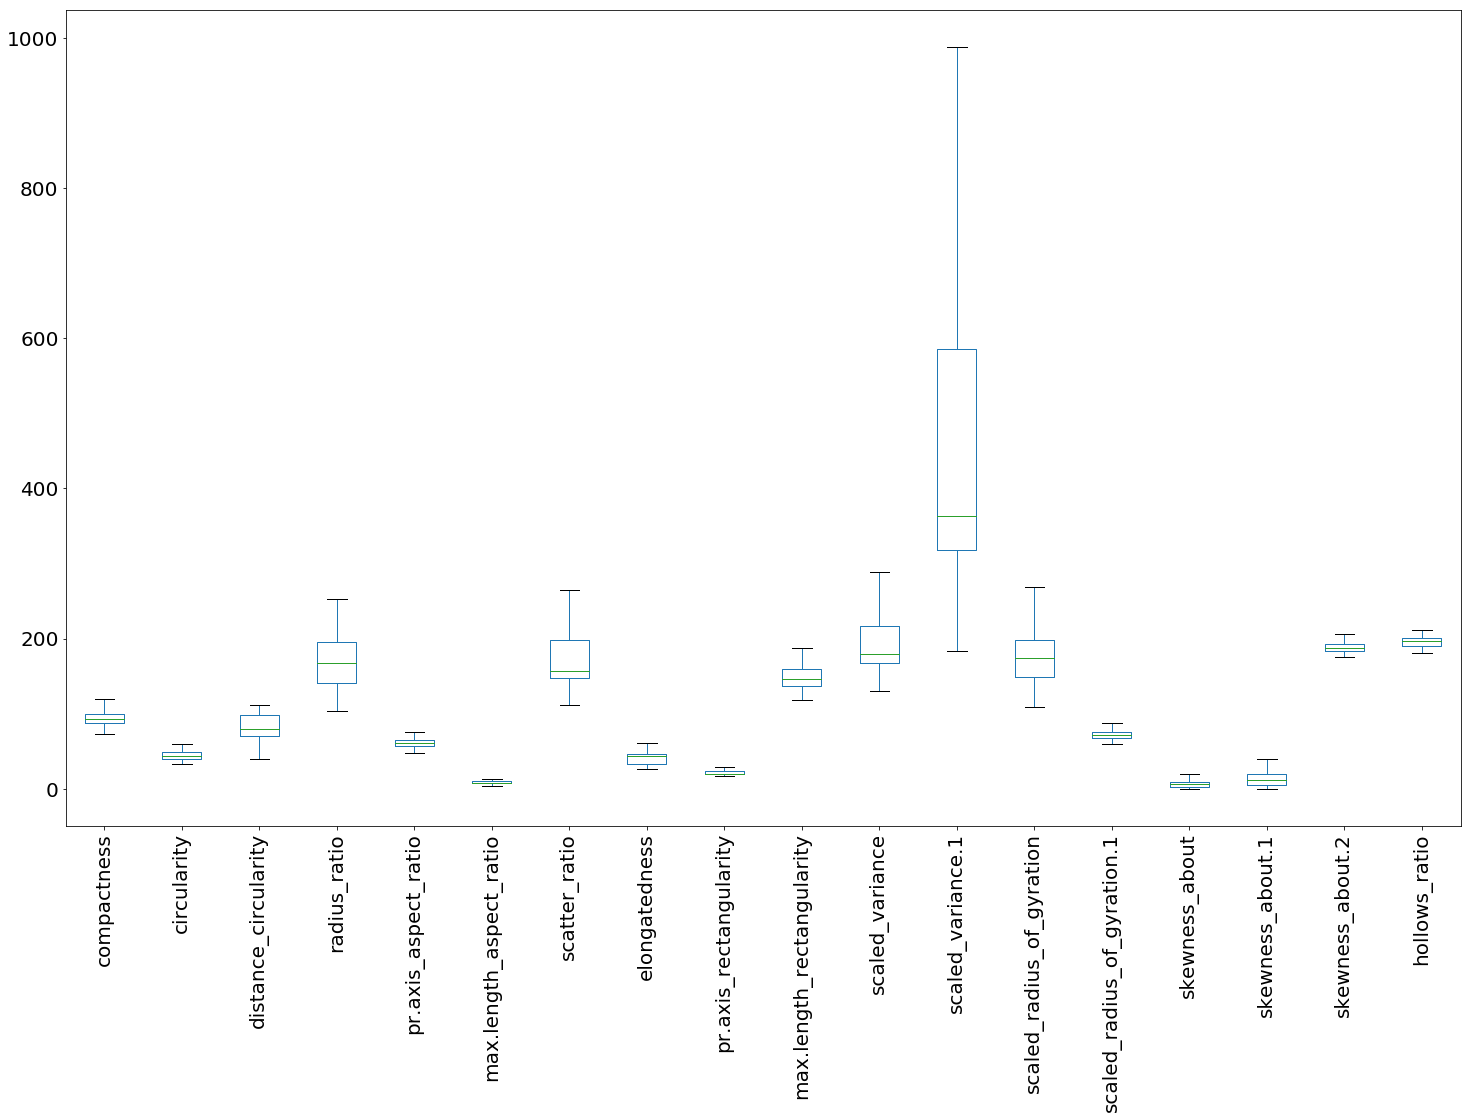

In [12]:
df.plot(kind='box', figsize=(25,15), fontsize=20)
plt.xticks(rotation=90)

# 4.3 Univariate Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010E89BBD7F0>,
      dtype=object)

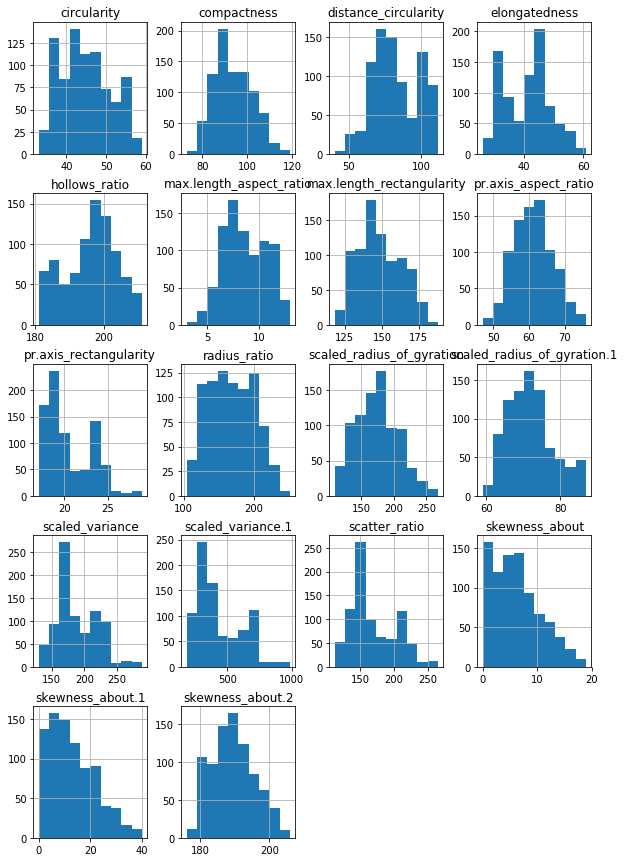

In [13]:
df.hist(figsize=(10,15))

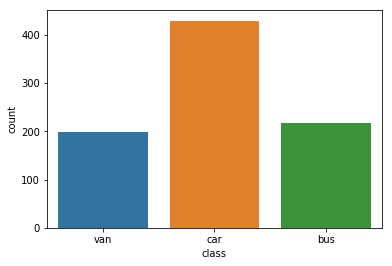

In [14]:
sns.countplot(df['class'])

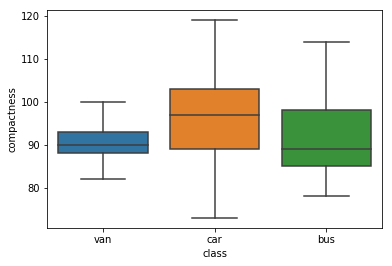

In [15]:
sns.boxplot(data=df, x = 'class', y = 'compactness')

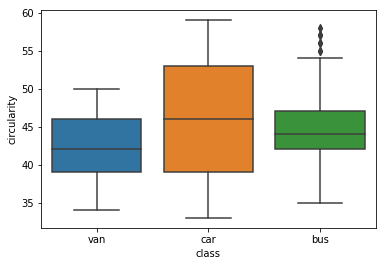

In [16]:
sns.boxplot(data=df, x = 'class', y = 'circularity')

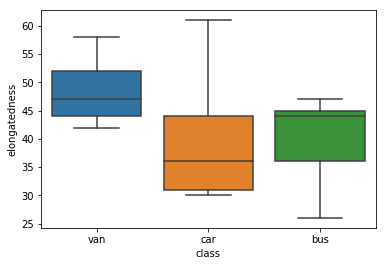

In [17]:
sns.boxplot(data=df, x = 'class', y = 'elongatedness')

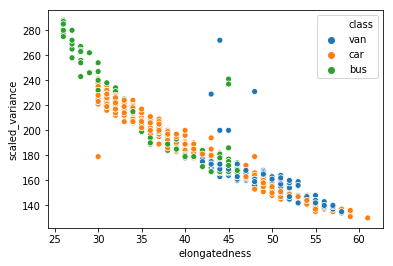

In [18]:
sns.scatterplot(data=df, x = 'elongatedness', y = 'scaled_variance', hue = 'class')

### Observations:

## 4.4 Pairplot

C:\Users\Ramya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ramya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ramya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ramya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


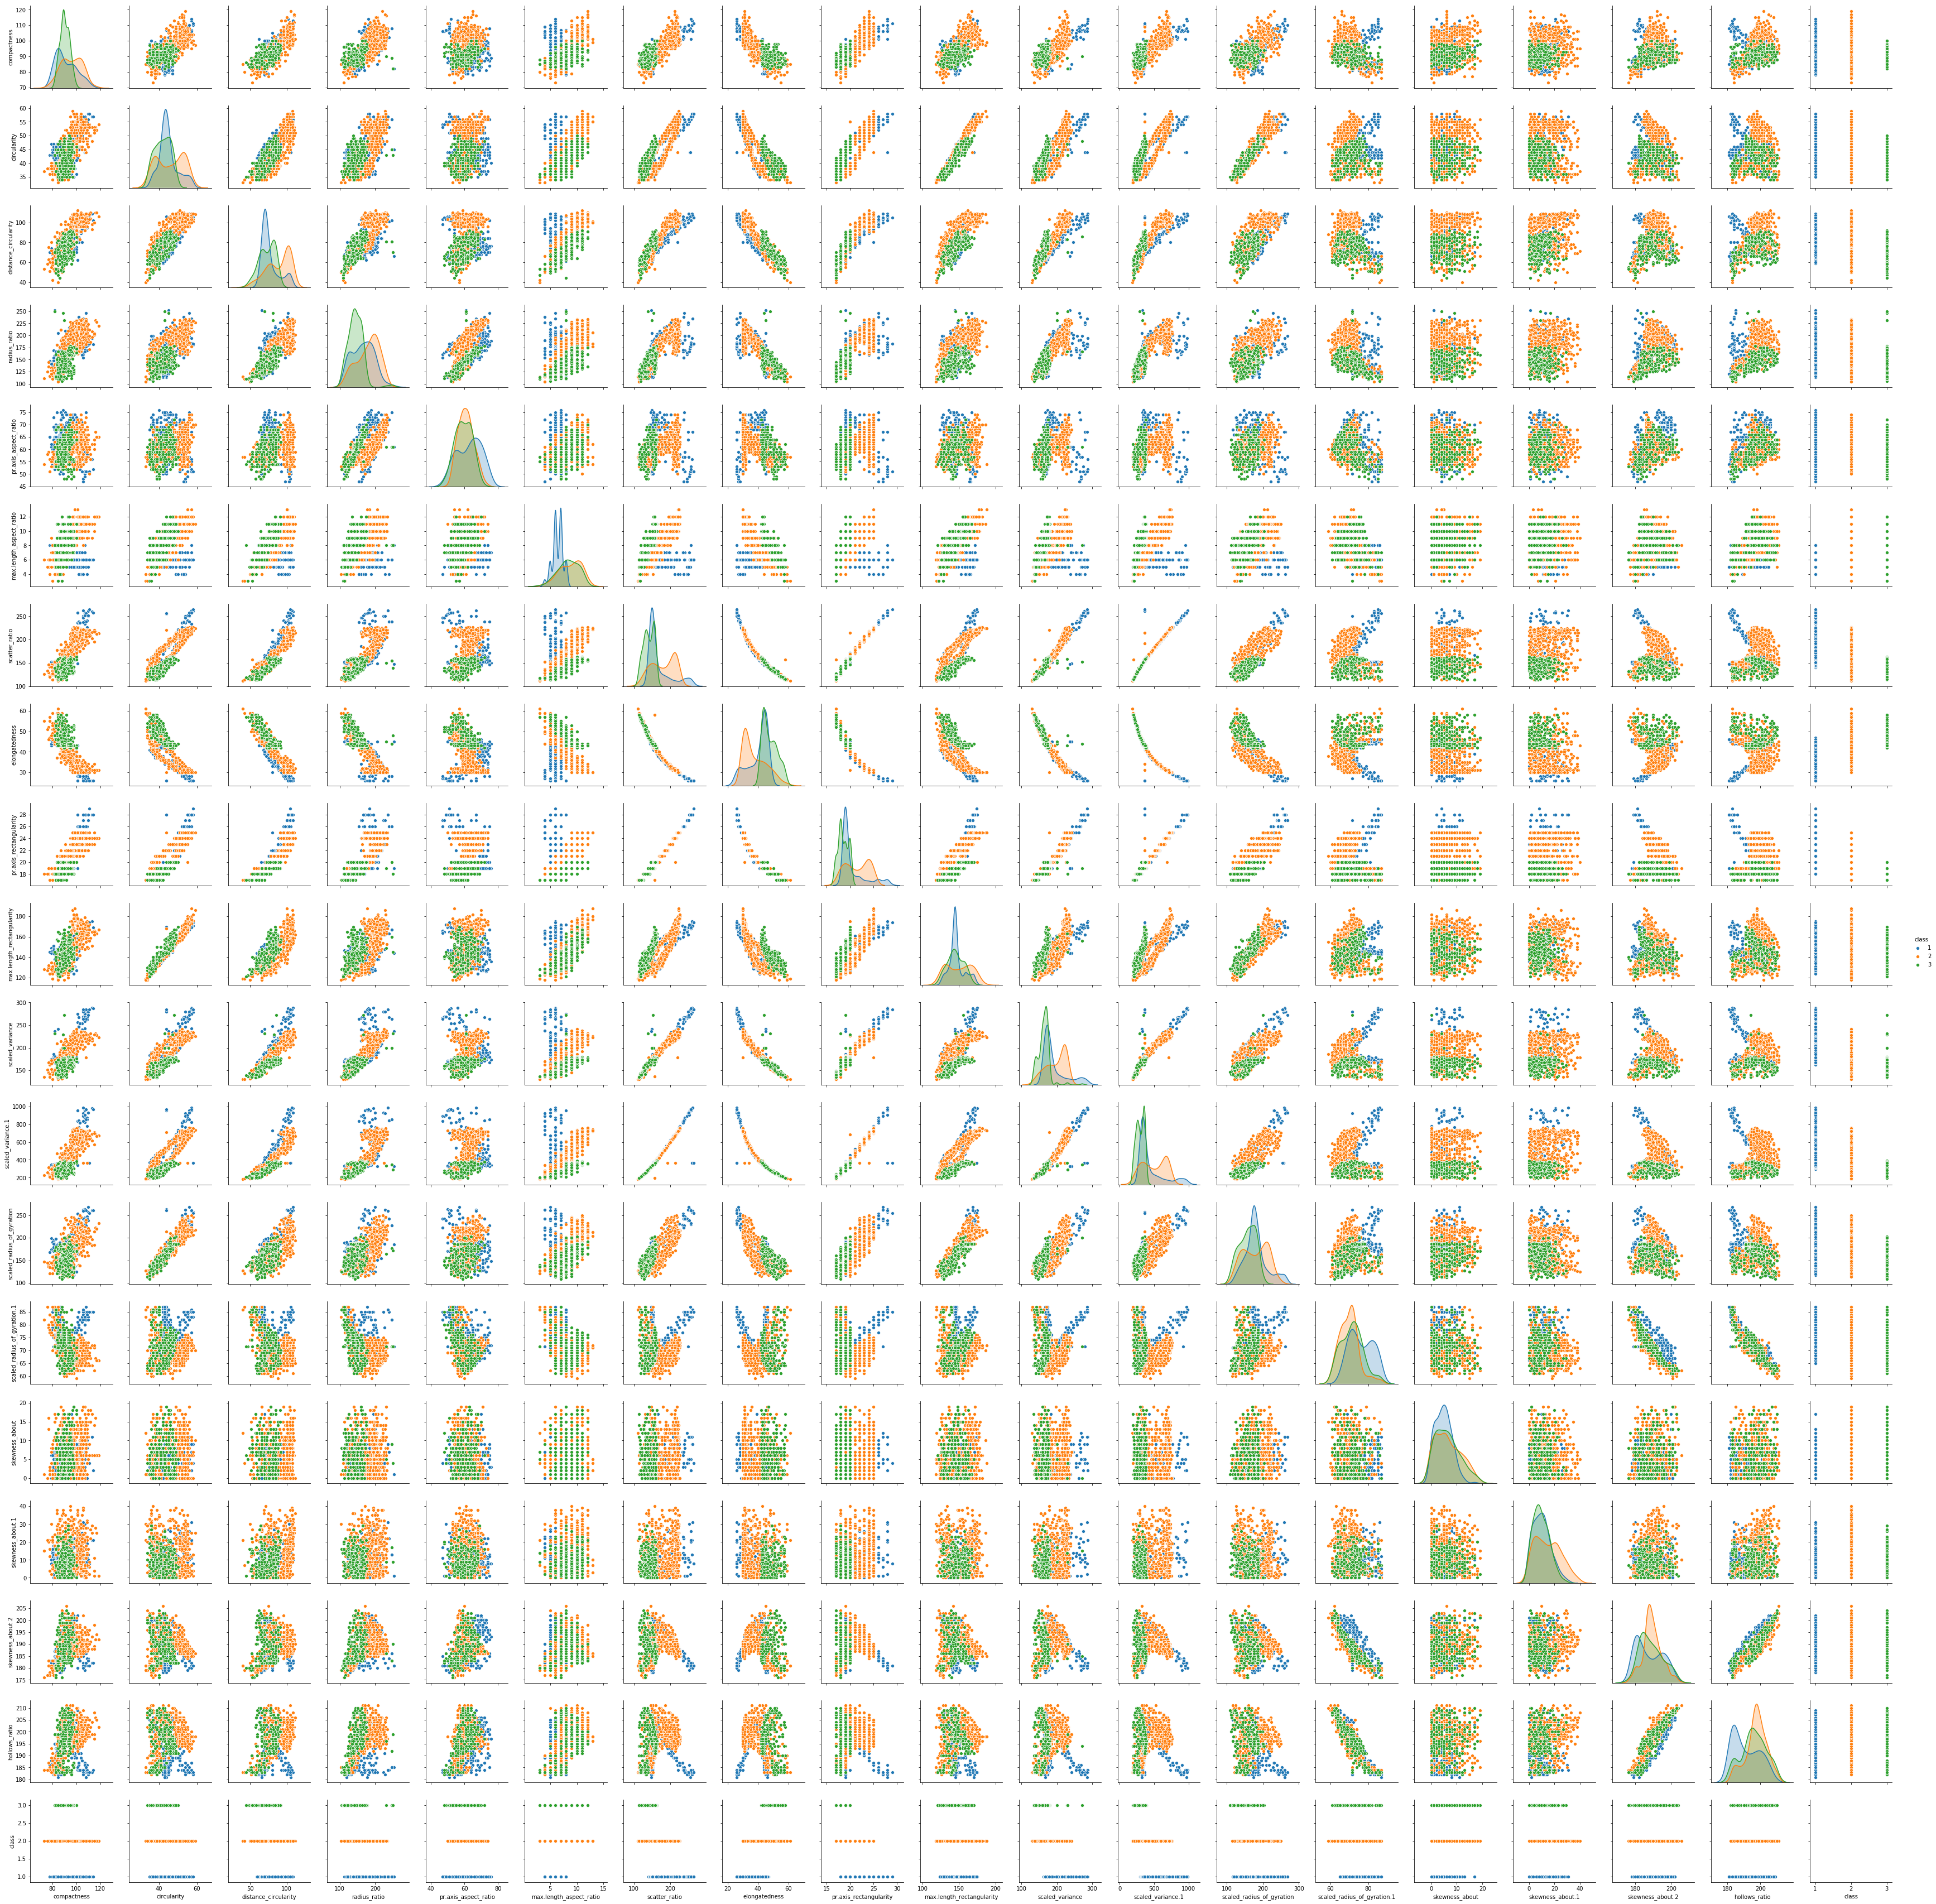

In [19]:
df['class'] = df['class'].replace({'bus':1, 'car':2, 'van':3})
sns.pairplot(df, diag_kind='kde', hue='class')

## 4.5 Correlation Matrix

In [20]:
corr = df.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

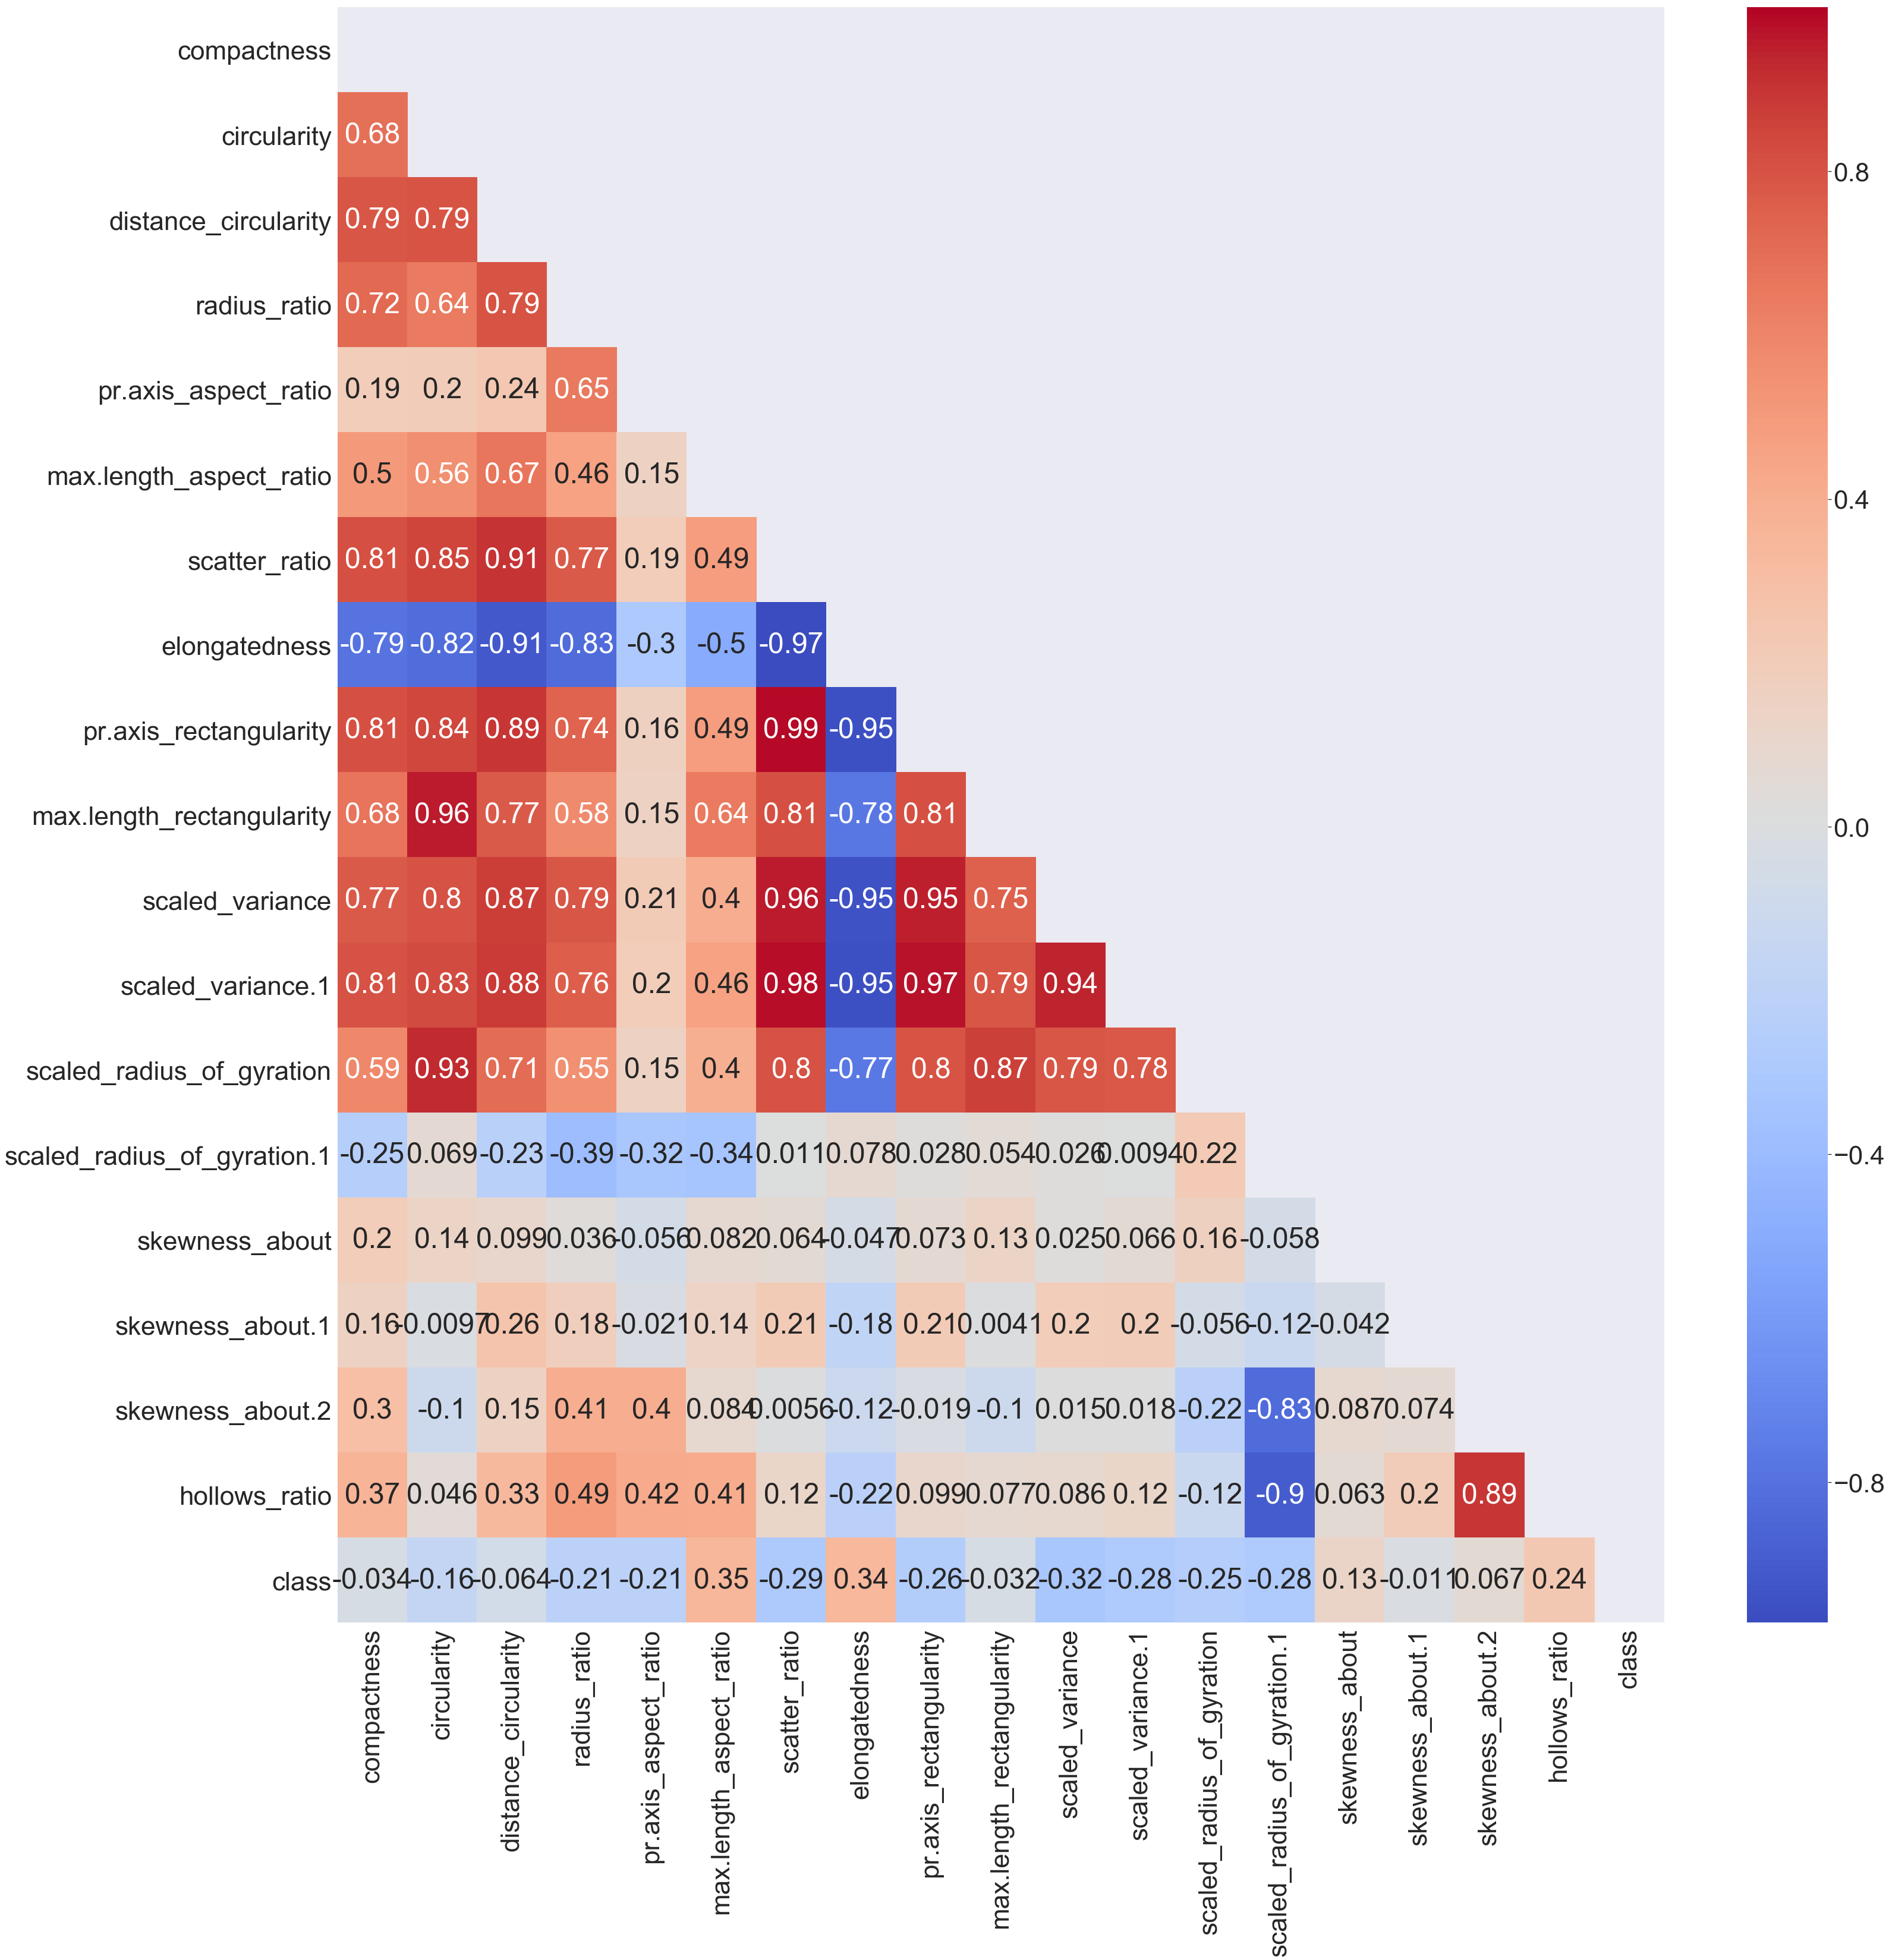

In [21]:
sns.set(font_scale=4)
plt.figure(figsize=(50,50))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True)

### Observations:

In [22]:
df1 = df.drop(['max.length_rectangularity', 'pr.axis_rectangularity', 'scaled_variance.1', 'scatter_ratio'], axis=1)
df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0                  72.0                     10.0           42.0   
1                  57.0                      9.0           45.0   
2                  66.0                     10.0           32.0   
3                  63.0                      9.0           46.0   
4                  61.0                      8.0           45.0   

   scaled_variance  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0            176.0                      184.0                         70.0   
1            170.0                      158.0                         72.0   
2            223.0                      220.0                         73.0   
3            160.0                      127.0                         63.0   
4            241.0                      188.0                         71.5   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  class  
0             6.0              16.0             187.0          197.0      3  
1             9.0              14.0             189.0          199.0      3  
2            14.0               9.0             188.0          196.0      2  
3             6.0              10.0             199.0          207.0      3  
4             9.0              11.0             180.0          183.0      1

In [23]:
df1.shape

(846, 15)

# 5. Build an SVM model

## 5.1 Standardize data

In [24]:
df1.iloc[:,0:14] = df1.iloc[:,0:14].apply(zscore)
df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0              1.933135                 0.912212       0.136262   
1             -0.740596                 0.427456       0.520519   
2              0.863642                 0.912212      -1.144597   
3              0.328896                 0.427456       0.648605   
4             -0.027601                -0.057300       0.520519   

   scaled_variance  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0        -0.400771                   0.285705                    -0.315806   
1        -0.594220                  -0.513630                     0.009122   
2         1.114582                   1.392477                     0.171586   
3        -0.916635                  -1.466683                    -1.453054   
4         1.694930                   0.408680                    -0.072110   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  class  
0       -0.032330          0.387162         -0.312012       0.183957      3  
1        0.624090          0.161740          0.013265       0.452977      3  
2        1.718123         -0.401818         -0.149374       0.049447      2  
3       -0.032330         -0.289106          1.639649       1.529056      3  
4        0.624090         -0.176395         -1.450481      -1.699181      1

## 5.2 Train/Test SVM

In [25]:
X = df1.drop('class', axis=1)
y = df1[['class']]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
svm = SVC(C=10)
svm.fit(X_train, y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_predict = svm.predict(X_test)

## 5.3 Get Accuracy

In [28]:
print('Accuracy(Train Data): {0:0.2f}%'.format(svm.score(X_train,y_train)*100))
print('Accuracy(Test Data): {0:0.2f}%'.format(svm.score(X_test,y_test)*100))

Accuracy(Train Data): 99.16%
Accuracy(Test Data): 96.06%


# 6. K-fold Cross Validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
array = df1.values
X_cv = array[:,0:14]
y_cv = array[:,14]


In [31]:
#X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size = 0.30, random_state=1)

In [32]:
kfold = KFold(n_splits=20, random_state=7)
model = SVC(C=10)
results = cross_val_score(model, X_cv, y_cv, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.95348837 0.95348837 0.95348837 1.         1.         0.93023256
 0.95238095 1.         0.95238095 0.97619048 0.97619048 1.
 0.95238095 1.         0.92857143 0.95238095 0.97619048 1.
 0.97619048 0.97619048]
Accuracy: 97.049% (2.339%)


### Observations:

# 7. Peform Principle Component Analysis (PCA)

## 7.1. Scale the original data

In [33]:
XScaled = df.drop('class', axis=1)
XScaled = XScaled.apply(zscore)
print(XScaled.shape)
XScaled.head()

(846, 18)


compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.912212      -0.207598   
1             -0.740596                 0.427456      -0.599423   
2              0.863642                 0.912212       1.148719   
3              0.328896                 0.427456      -0.750125   
4             -0.027601                -0.057300      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.400771          -0.337407                   0.285705   
1        -0.594220          -0.618623                  -0.513630   
2         1.114582           1.131806                   1.392477   
3        -0.916635          -0.739145                  -1.466683   
4         1.694930          -0.647319                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   
3                    -1.453054       -0.032330         -0.289106   
4                    -0.072110        0.624090         -0.176395   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

## 7.2 Get the covariance matrix

In [34]:
covMatrix = np.cov(XScaled, rowvar=False)
covMatrix

array([[ 1.00118343,  0.68569786,  0.79086299,  0.72277977,  0.1930925 ,
         0.50051942,  0.81358214, -0.78968322,  0.81465658,  0.67694334,
         0.77078163,  0.80712401,  0.58593517, -0.24697246,  0.19754181,
         0.1565327 ,  0.29889034,  0.36598446],
       [ 0.68569786,  1.00118343,  0.79325751,  0.63903532,  0.20349327,
         0.5611334 ,  0.8489411 , -0.82244387,  0.84439802,  0.96245572,
         0.80371846,  0.82844154,  0.92691166,  0.06882659,  0.13651201,
        -0.00967793, -0.10455005,  0.04640562],
       [ 0.79086299,  0.79325751,  1.00118343,  0.79516215,  0.24462154,
         0.66759792,  0.90614687, -0.9123854 ,  0.89408198,  0.77544391,
         0.87061349,  0.88498924,  0.70660663, -0.22962442,  0.09922417,
         0.26265581,  0.14627113,  0.33312625],
       [ 0.72277977,  0.63903532,  0.79516215,  1.00118343,  0.65132393,
         0.46450748,  0.77085211, -0.82636872,  0.74502008,  0.58015378,
         0.78711387,  0.76115704,  0.55142559, -0.390

#### Since there are 18 principle components, this would be an 18*18 dimension matrix

## 7.3 Execute PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 7.4 Get Eigen values

In [37]:
print(pca.explained_variance_)

[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 4.01448646e-02 3.22758478e-02 2.93936408e-02 2.27005257e-02
 1.98136761e-02 5.16287320e-03]


## 7.5 Get Eigen Vectors

In [38]:
print(pca.components_)

[[ 2.72502890e-01  2.87254690e-01  3.02421105e-01  2.69713545e-01
   9.78607336e-02  1.95200137e-01  3.10523932e-01 -3.09006904e-01
   3.07287000e-01  2.78154157e-01  2.99765086e-01  3.05532374e-01
   2.63237620e-01 -4.19359352e-02  3.60832115e-02  5.87204797e-02
   3.80131449e-02  8.47399995e-02]
 [-8.70435783e-02  1.31621757e-01 -4.61430061e-02 -1.97931263e-01
  -2.57839952e-01 -1.08045626e-01  7.52853487e-02 -1.32299375e-02
   8.75601978e-02  1.22154240e-01  7.72657535e-02  7.15030171e-02
   2.10582046e-01  5.03621577e-01 -1.57663214e-02 -9.27462386e-02
  -5.01621218e-01 -5.07612106e-01]
 [-3.81852075e-02 -2.01146908e-01  6.34621085e-02  5.62851689e-02
  -6.19927464e-02 -1.48957820e-01  1.09042833e-01 -9.08526930e-02
   1.06070496e-01 -2.13684693e-01  1.44599805e-01  1.10343735e-01
  -2.02870191e-01  7.38640211e-02 -5.59173987e-01  6.70680496e-01
  -6.22407145e-02 -4.17053530e-02]
 [ 1.38675013e-01 -3.80554832e-02  1.08954287e-01 -2.54355087e-01
  -6.12765722e-01  2.78678159e-01  5.

## 7.5 Get Percent Variance

In [39]:
print(pca.explained_variance_ratio_)

[5.40993254e-01 1.85931025e-01 6.61651173e-02 6.29154973e-02
 4.90529110e-02 3.69710110e-02 1.76541580e-02 1.26616348e-02
 7.27020705e-03 4.43152841e-03 4.07284383e-03 3.58554935e-03
 2.22763400e-03 1.79098315e-03 1.63104981e-03 1.25964961e-03
 1.09945865e-03 2.86487251e-04]


## 7.6 Plot Variance Ratio vs eigen value

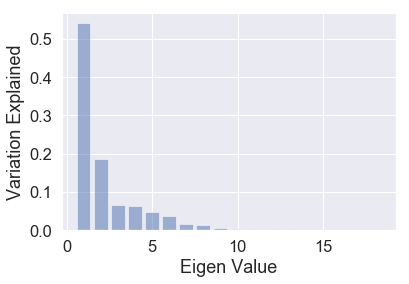

In [40]:
sns.set(font_scale=1.5)
plt.bar(list(range(1,19)),pca.explained_variance_ratio_, alpha=0.5)
plt.ylabel('Variation Explained')
plt.xlabel('Eigen Value')
plt.show()

## 7.7 Step Plot to show Cummulative Variation

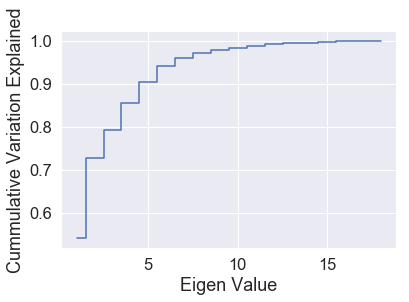

In [41]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cummulative Variation Explained')
plt.xlabel('Eigen Value')
plt.show()

### Observation:


# 7.8 Select 10 PCA dimensions

In [42]:
pca = PCA(n_components = 10)
X_red = pca.fit_transform(XScaled)
X_red[0:2]

array([[ 0.58422804, -0.67567325, -0.45333356, -0.75065628, -0.77751466,
        -1.84880885, -0.18041487, -0.68196902,  0.31266966,  0.14411602],
       [-1.5121798 , -0.34893367, -0.33343619,  1.26895261, -0.32492864,
        -0.11831711,  0.20330786,  0.10442512, -0.29625823, -0.39097765]])

# 8. Apply SVM on the transformed data


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size = 0.30, random_state=1)


In [44]:
svm_pca= SVC(C=10)
svm_pca.fit(X_test, y_test)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
y_predict = svm_pca.predict(X_test)

In [46]:
print('Accuracy(Train Data): {0:0.2f}%'.format(svm_pca.score(X_train,y_train)*100))
print('Accuracy(Test Data): {0:0.2f}%'.format(svm_pca.score(X_test,y_test)*100))

Accuracy(Train Data): 93.75%
Accuracy(Test Data): 99.61%


# 9. Apply K-fold Cross Validation on the transformed data

In [47]:
kfold = KFold(n_splits=20, random_state=7)
model = SVC(C=10)
results = cross_val_score(model, X_red, y_cv, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.95348837 0.93023256 0.93023256 1.         0.95348837 0.93023256
 0.95238095 1.         0.9047619  0.97619048 0.97619048 0.97619048
 0.9047619  1.         0.92857143 0.88095238 0.92857143 1.
 0.97619048 0.97619048]
Accuracy: 95.393% (3.471%)


# 10. Comparision of SVM Accuracy/Cross Validation Scores

In [48]:
Result = pd.DataFrame({'Accuracy':[96.06, 95.67], 'Cross Validation':[97.05,95.39]}, index = ['Raw Data', 'PCA Transformed'])
Result

Accuracy  Cross Validation
Raw Data            96.06             97.05
PCA Transformed     95.67             95.39